<a href="https://colab.research.google.com/github/PandiRaja18/ML-Projects/blob/main/Water_Purity_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

In [ ]:
#Loading the dataset water_potability.csv with pandas
df = pd.read_csv('ANN Complete Matrix for three dyes.csv')

In [ ]:
df.head()

,Conc of H2O2 (mM),Dose of gamma ray (kGy),pH,Concentration of dye (mg/L),Response
0,0.0,0,3,100,0.0
1,0.0,0,5,100,0.0
2,0.0,0,7,100,0.0
3,0.0,0,9,100,0.0
4,0.0,0,11,100,0.0


In [ ]:
df.describe()
np.shape(df)

(750, 5)

In [ ]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)

In [ ]:
y = df['Response']
X = df.drop(['Response'],axis=1)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

Size Training Set: 675
Size Testing Set: 75


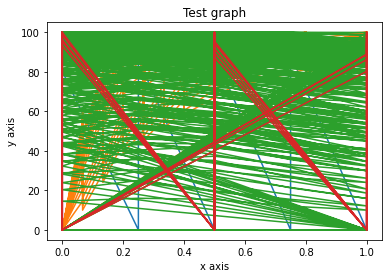

In [ ]:
plt.plot(X,y)
plt.title ('Test graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(layers.Dense(128, input_dim = 4))
model.add(Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(32,activation='relu'))
model.add(Dropout(0.45))
model.add(layers.Dense(16,activation='relu'))
model.add(Dropout(0.45))
model.add(layers.Dense(1))

In [ ]:
from pandas.core.arrays import categorical
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_absolute_error', optimizer=opt,metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
43/43 [==============================] - 2s 7ms/step - loss: 69.5631 - accuracy: 0.1037 - val_loss: 74.2269 - val_accuracy: 0.0667
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 69.4404 - accuracy: 0.1007 - val_loss: 74.1482 - val_accuracy: 0.0667
Epoch 3/50
43/43 [==============================] - 0s 3ms/step - loss: 69.3709 - accuracy: 0.0963 - val_loss: 74.0821 - val_accuracy: 0.0667
Epoch 4/50
43/43 [==============================] - 0s 3ms/step - loss: 69.2836 - accuracy: 0.0904 - val_loss: 74.0046 - val_accuracy: 0.0667
Epoch 5/50
43/43 [==============================] - 0s 4ms/step - loss: 69.1715 - accuracy: 0.0815 - val_loss: 73.8765 - val_accuracy: 0.0667
Epoch 6/50
43/43 [==============================] - 0s 4ms/step - loss: 69.0022 - accuracy: 0.0696 - val_loss: 73.6373 - val_accuracy: 0.0267
Epoch 7/50
43/43 [==============================] - 0s 3ms/step - loss: 68.7242 - accuracy: 0.0504 - val_loss: 73.1902 - val_accuracy: 0.0133
Epoch 

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 128)               640       
                                                                 
 dropout_77 (Dropout)        (None, 128)               0         
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 dropout_78 (Dropout)        (None, 64)                0         
                                                                 
 dense_94 (Dense)            (None, 64)                4160      
                                                                 
 dropout_79 (Dropout)        (None, 64)                0         
                                                                 
 dense_95 (Dense)            (None, 32)              

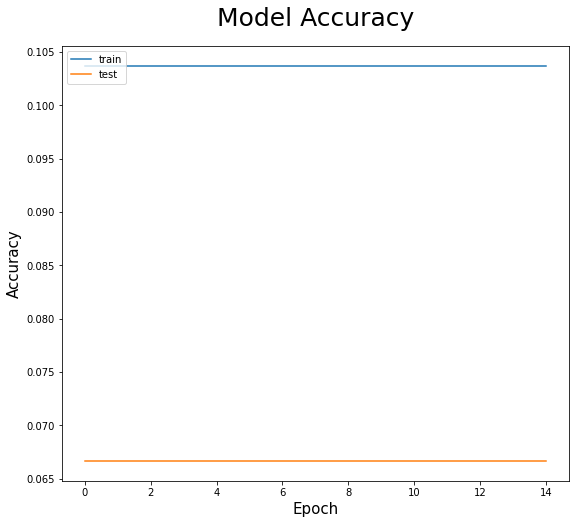

In [ ]:
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
745    90.22
746    94.61
747    90.48
748    86.44
749    82.35
Name: Response, Length: 750, dtype: float64